# Kidney Stone Detection using Vision Transformers

#### This notebook explores the use of Vision Transformers for detecting kidney stones in medical images.
#### We will be using three different Vision Transformer architectures: Vision Transformer (ViT), Swin Transformer, and MaxViT.

# Data Loading and Preprocessing


In [51]:
# !pip install kagglehub
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import kagglehub
import zipfile
import seaborn as sns

In [23]:
# prompt: remove /content/data

import shutil

if os.path.exists('/content/dataset'):
  shutil.rmtree('/content/dataset')


In [18]:
import os

# Create the 'data' directory if it doesn't exist
if not os.path.exists('data'):
    os.makedirs('data')

In [19]:
!unzip /content/Cyst.zip -d data/Cyst

Archive:  /content/Cyst.zip
  inflating: data/Cyst/Cyst- (3707).jpg  
  inflating: data/Cyst/Cyst- (3706).jpg  
  inflating: data/Cyst/Cyst- (3705).jpg  
  inflating: data/Cyst/Cyst- (3704).jpg  
  inflating: data/Cyst/Cyst- (3703).jpg  
  inflating: data/Cyst/Cyst- (3702).jpg  
  inflating: data/Cyst/Cyst- (3701).jpg  
  inflating: data/Cyst/Cyst- (3700).jpg  
  inflating: data/Cyst/Cyst- (3699).jpg  
  inflating: data/Cyst/Cyst- (3698).jpg  
  inflating: data/Cyst/Cyst- (3697).jpg  
  inflating: data/Cyst/Cyst- (3696).jpg  
  inflating: data/Cyst/Cyst- (3695).jpg  
  inflating: data/Cyst/Cyst- (3694).jpg  
  inflating: data/Cyst/Cyst- (3693).jpg  
  inflating: data/Cyst/Cyst- (3692).jpg  
  inflating: data/Cyst/Cyst- (3691).jpg  
  inflating: data/Cyst/Cyst- (3690).jpg  
  inflating: data/Cyst/Cyst- (3689).jpg  
  inflating: data/Cyst/Cyst- (3688).jpg  
  inflating: data/Cyst/Cyst- (3687).jpg  
  inflating: data/Cyst/Cyst- (3686).jpg  
  inflating: data/Cyst/Cyst- (3685).jpg  
  infl

In [20]:
!unzip /content/Normal.zip -d data/Normal


Streaming output truncated to the last 5000 lines.
  inflating: data/Normal/Normal- (4999).jpg  
  inflating: data/Normal/Normal- (4998).jpg  
  inflating: data/Normal/Normal- (4997).jpg  
  inflating: data/Normal/Normal- (4996).jpg  
  inflating: data/Normal/Normal- (4995).jpg  
  inflating: data/Normal/Normal- (4994).jpg  
  inflating: data/Normal/Normal- (4993).jpg  
  inflating: data/Normal/Normal- (4992).jpg  
  inflating: data/Normal/Normal- (4991).jpg  
  inflating: data/Normal/Normal- (4990).jpg  
  inflating: data/Normal/Normal- (4989).jpg  
  inflating: data/Normal/Normal- (4988).jpg  
  inflating: data/Normal/Normal- (4987).jpg  
  inflating: data/Normal/Normal- (4986).jpg  
  inflating: data/Normal/Normal- (4985).jpg  
  inflating: data/Normal/Normal- (4984).jpg  
  inflating: data/Normal/Normal- (4983).jpg  
  inflating: data/Normal/Normal- (4982).jpg  
  inflating: data/Normal/Normal- (4981).jpg  
  inflating: data/Normal/Normal- (4980).jpg  
  inflating: data/Normal/Norm

In [21]:
!unzip /content/Stone.zip -d data/Stone


Archive:  /content/Stone.zip
  inflating: data/Stone/Stone- (1377).jpg  
  inflating: data/Stone/Stone- (1376).jpg  
  inflating: data/Stone/Stone- (1375).jpg  
  inflating: data/Stone/Stone- (1374).jpg  
  inflating: data/Stone/Stone- (1373).jpg  
  inflating: data/Stone/Stone- (1372).jpg  
  inflating: data/Stone/Stone- (1371).jpg  
  inflating: data/Stone/Stone- (1370).jpg  
  inflating: data/Stone/Stone- (1369).jpg  
  inflating: data/Stone/Stone- (1368).jpg  
  inflating: data/Stone/Stone- (1367).jpg  
  inflating: data/Stone/Stone- (1366).jpg  
  inflating: data/Stone/Stone- (1365).jpg  
  inflating: data/Stone/Stone- (1364).jpg  
  inflating: data/Stone/Stone- (1363).jpg  
  inflating: data/Stone/Stone- (1362).jpg  
  inflating: data/Stone/Stone- (1361).jpg  
  inflating: data/Stone/Stone- (1360).jpg  
  inflating: data/Stone/Stone- (1359).jpg  
  inflating: data/Stone/Stone- (1358).jpg  
  inflating: data/Stone/Stone- (1357).jpg  
  inflating: data/Stone/Stone- (1356).jpg  
  i

In [22]:
!unzip /content/Tumor.zip -d data/Tumor

Archive:  /content/Tumor.zip
  inflating: data/Tumor/Tumor- (2).jpg  
  inflating: data/Tumor/Tumor- (3).jpg  
  inflating: data/Tumor/Tumor- (4).jpg  
  inflating: data/Tumor/Tumor- (5).jpg  
  inflating: data/Tumor/Tumor- (6).jpg  
  inflating: data/Tumor/Tumor- (7).jpg  
  inflating: data/Tumor/Tumor- (8).jpg  
  inflating: data/Tumor/Tumor- (9).jpg  
  inflating: data/Tumor/Tumor- (10).jpg  
  inflating: data/Tumor/Tumor- (11).jpg  
  inflating: data/Tumor/Tumor- (12).jpg  
  inflating: data/Tumor/Tumor- (13).jpg  
  inflating: data/Tumor/Tumor- (14).jpg  
  inflating: data/Tumor/Tumor- (15).jpg  
  inflating: data/Tumor/Tumor- (16).jpg  
  inflating: data/Tumor/Tumor- (17).jpg  
  inflating: data/Tumor/Tumor- (18).jpg  
  inflating: data/Tumor/Tumor- (19).jpg  
  inflating: data/Tumor/Tumor- (20).jpg  
  inflating: data/Tumor/Tumor- (21).jpg  
  inflating: data/Tumor/Tumor- (22).jpg  
  inflating: data/Tumor/Tumor- (23).jpg  
  inflating: data/Tumor/Tumor- (24).jpg  
  inflating: 

In [24]:
base_path = "/content/data"
categories = ["Cyst", "Normal", "Stone", "Tumor"]

In [25]:
image_paths = []
labels = []

In [26]:
image_paths = []
labels = []

for category in categories:
    category_path = os.path.join(base_path, category)
    for image_name in os.listdir(category_path):
        image_path = os.path.join(category_path, image_name)
        image_paths.append(image_path)
        labels.append(category)

df = pd.DataFrame({
    "image_path": image_paths,
    "label": labels
})

In [27]:
df.head()

,image_path,label
0,/content/data/Cyst/Cyst- (3136).jpg,Cyst
1,/content/data/Cyst/Cyst- (170).jpg,Cyst
2,/content/data/Cyst/Cyst- (1433).jpg,Cyst
3,/content/data/Cyst/Cyst- (3627).jpg,Cyst
4,/content/data/Cyst/Cyst- (2762).jpg,Cyst


In [28]:
df.tail()

,image_path,label
12441,/content/data/Tumor/Tumor- (444).jpg,Tumor
12442,/content/data/Tumor/Tumor- (106).jpg,Tumor
12443,/content/data/Tumor/Tumor- (1209).jpg,Tumor
12444,/content/data/Tumor/Tumor- (240).jpg,Tumor
12445,/content/data/Tumor/Tumor- (535).jpg,Tumor


In [29]:
df.columns

Index(['image_path', 'label'], dtype='object')

In [30]:
df.shape


(12446, 2)

In [31]:
df.duplicated().sum()


0

In [32]:
df.isnull().sum()


,0
image_path,0
label,0


In [33]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12446 entries, 0 to 12445
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  12446 non-null  object
 1   label       12446 non-null  object
dtypes: object(2)
memory usage: 194.6+ KB


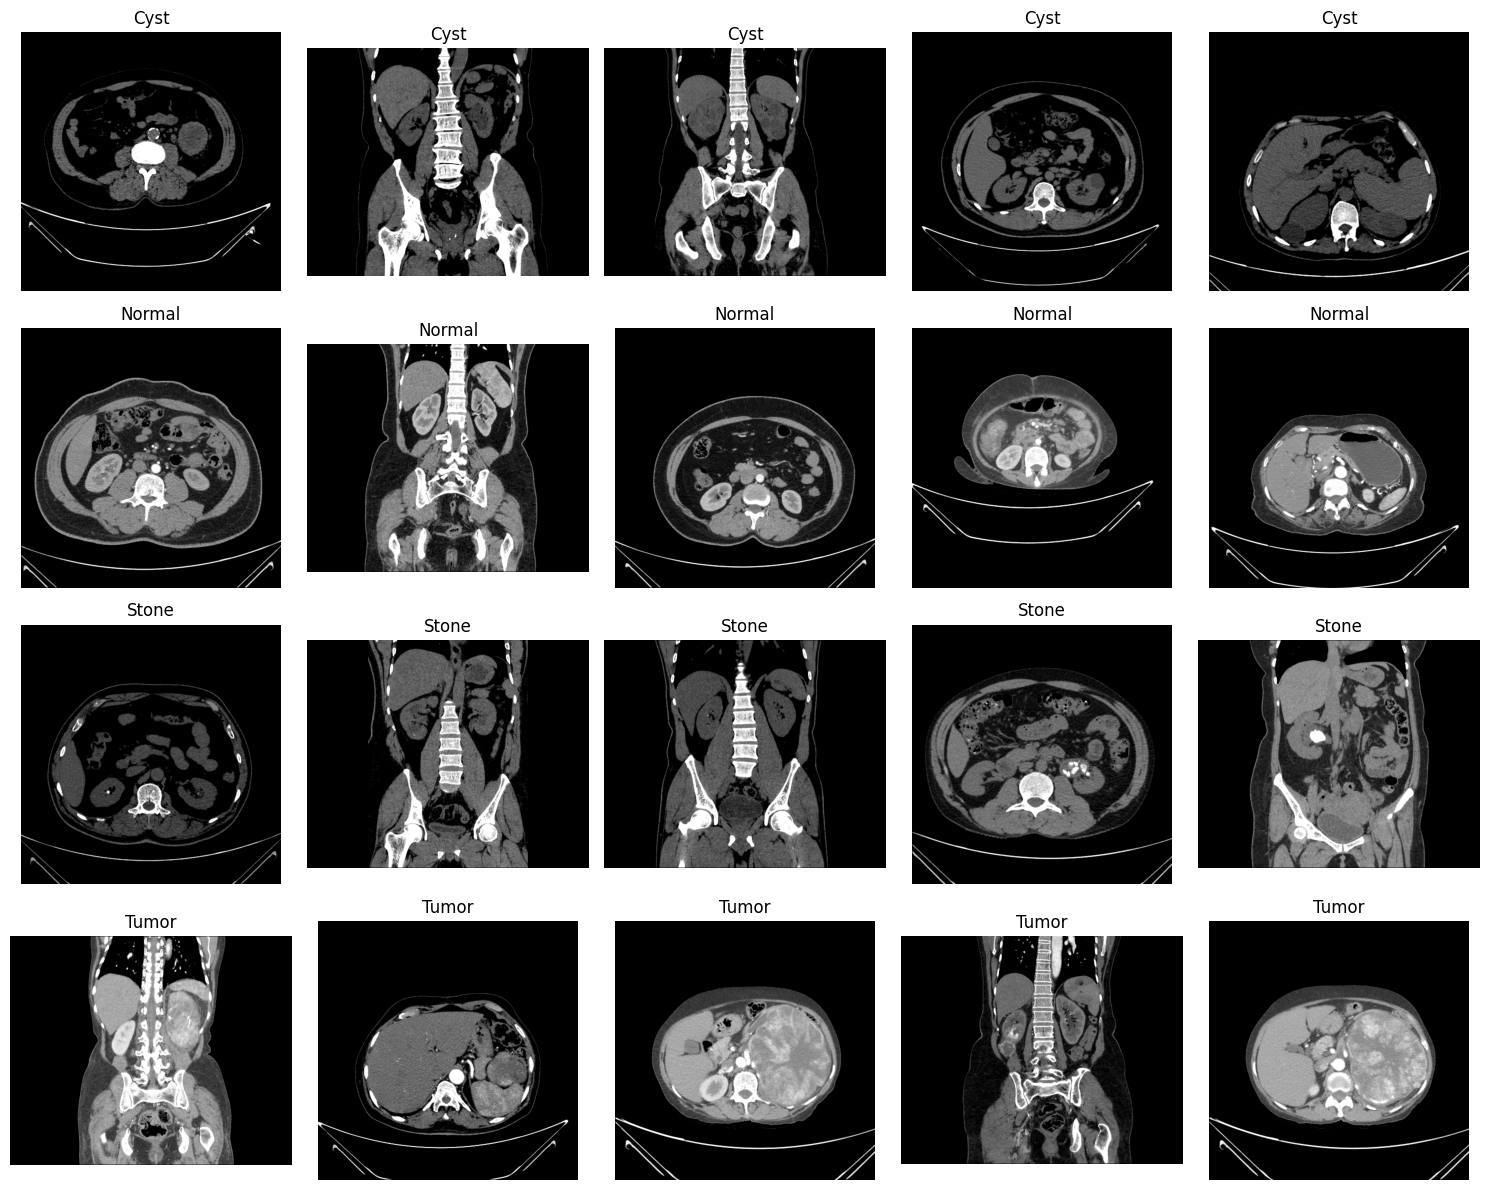

In [34]:
import cv2

num_images = 5

plt.figure(figsize=(15, 12))

for i, category in enumerate(categories):
    category_images = df[df['label'] == category]['image_path'].iloc[:num_images]

    for j, img_path in enumerate(category_images):

        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.subplot(len(categories), num_images, i * num_images + j + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(category)

plt.tight_layout()
plt.show()

In [35]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['category_encoded'] = label_encoder.fit_transform(df['label'])

In [36]:
df = df[['image_path', 'category_encoded']]

In [37]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(df[['image_path']], df['category_encoded'])

df_resampled = pd.DataFrame(X_resampled, columns=['image_path'])
df_resampled['category_encoded'] = y_resampled

In [38]:
print("\nClass distribution after oversampling:")
print(df_resampled['category_encoded'].value_counts())


Class distribution after oversampling:
category_encoded
0    5077
1    5077
2    5077
3    5077
Name: count, dtype: int64


In [39]:
df_resampled

,image_path,category_encoded
0,/content/data/Cyst/Cyst- (3136).jpg,0
1,/content/data/Cyst/Cyst- (170).jpg,0
2,/content/data/Cyst/Cyst- (1433).jpg,0
3,/content/data/Cyst/Cyst- (3627).jpg,0
4,/content/data/Cyst/Cyst- (2762).jpg,0
...,...,...
20303,/content/data/Tumor/Tumor- (1119).jpg,3
20304,/content/data/Tumor/Tumor- (1445).jpg,3
20305,/content/data/Tumor/Tumor- (1535).jpg,3
20306,/content/data/Tumor/Tumor- (612).jpg,3


In [40]:
df_resampled['category_encoded'] = df_resampled['category_encoded'].astype(str)

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

import warnings
warnings.filterwarnings("ignore")

In [42]:
train_df_new, temp_df_new = train_test_split(
    df_resampled,
    train_size=0.8,
    shuffle=True,
    random_state=42,
    stratify=df_resampled['category_encoded']
)

valid_df_new, test_df_new = train_test_split(
    temp_df_new,
    test_size=0.5,
    shuffle=True,
    random_state=42,
    stratify=temp_df_new['category_encoded']
)

In [43]:
batch_size = 16
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

tr_gen = ImageDataGenerator(rescale=1./255)
ts_gen = ImageDataGenerator(rescale=1./255)

train_gen_new = tr_gen.flow_from_dataframe(
    train_df_new,
    x_col='image_path',
    y_col='category_encoded',
    target_size=img_size,
    class_mode='sparse',
    color_mode='rgb',
    shuffle=True,
    batch_size=batch_size
)

valid_gen_new = ts_gen.flow_from_dataframe(
    valid_df_new,
    x_col='image_path',
    y_col='category_encoded',
    target_size=img_size,
    class_mode='sparse',
    color_mode='rgb',
    shuffle=True,
    batch_size=batch_size
)

test_gen_new = ts_gen.flow_from_dataframe(
    test_df_new,
    x_col='image_path',
    y_col='category_encoded',
    target_size=img_size,
    class_mode='sparse',
    color_mode='rgb',
    shuffle=False,
    batch_size=batch_size
)

Found 16246 validated image filenames belonging to 4 classes.
Found 2031 validated image filenames belonging to 4 classes.
Found 2031 validated image filenames belonging to 4 classes.


In [44]:
import tensorflow as tf

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [45]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print("GPU is set for TensorFlow")
    except RuntimeError as e:
        print(e)

GPU is set for TensorFlow


In [46]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


In [47]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


# Vision Transformer

In [48]:
from tensorflow.keras import layers

class PatchEmbedding(layers.Layer):
    def __init__(self, patch_size, embed_dim):
        super(PatchEmbedding, self).__init__()
        self.patch_size = patch_size
        self.embed_dim = embed_dim
        self.proj = layers.Conv2D(embed_dim, patch_size, strides=patch_size, padding='valid')

    def call(self, images):
        patches = self.proj(images)
        patches = tf.reshape(patches, (tf.shape(patches)[0], -1, self.embed_dim))
        return patches

class MultiHeadSelfAttention(layers.Layer):
    def __init__(self, num_heads, embed_dim):
        super(MultiHeadSelfAttention, self).__init__()
        self.attention = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)

    def call(self, inputs):
        return self.attention(inputs, inputs)

class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, mlp_dim, dropout_rate):
        super(TransformerBlock, self).__init__()
        self.attention = MultiHeadSelfAttention(num_heads, embed_dim)
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.mlp = tf.keras.Sequential([
            layers.Dense(mlp_dim, activation='gelu'),
            layers.Dropout(dropout_rate),
            layers.Dense(embed_dim),
            layers.Dropout(dropout_rate)
        ])

    def call(self, inputs):
        x = self.layernorm1(inputs)
        x = self.attention(x)
        x = x + inputs
        x = self.layernorm2(x)
        x = self.mlp(x)
        return x + inputs

class VisionTransformer(tf.keras.Model):
    def __init__(self, image_size, patch_size, embed_dim, num_heads, num_blocks, mlp_dim, num_classes, dropout_rate=0.1):
        super(VisionTransformer, self).__init__()
        self.patch_embed = PatchEmbedding(patch_size, embed_dim)

        height, width, _ = image_size
        num_patches = (height // patch_size) * (width // patch_size)

        self.pos_embed = self.add_weight(
            name="pos_embed",
            shape=(1, num_patches + 1, embed_dim),
            initializer=tf.initializers.RandomNormal(stddev=0.02),
            trainable=True
        )

        self.cls_token = self.add_weight(
            name="cls_token",
            shape=(1, 1, embed_dim),
            initializer=tf.initializers.RandomNormal(stddev=0.02),
            trainable=True
        )

        self.dropout = layers.Dropout(dropout_rate)
        self.transformer_blocks = [TransformerBlock(embed_dim, num_heads, mlp_dim, dropout_rate) for _ in range(num_blocks)]
        self.layernorm = layers.LayerNormalization(epsilon=1e-6)
        self.classifier = layers.Dense(num_classes, activation='softmax')

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = self.patch_embed(images)

        cls_tokens = tf.repeat(self.cls_token, repeats=batch_size, axis=0)
        x = tf.concat([cls_tokens, patches], axis=1)

        pos_embed = tf.repeat(self.pos_embed, repeats=batch_size, axis=0)
        x = x + pos_embed
        x = self.dropout(x)

        for block in self.transformer_blocks:
            x = block(x)

        x = self.layernorm(x)
        cls_token_final = x[:, 0]
        return self.classifier(cls_token_final)


image_size = (224, 224, 3)
patch_size = 16
embed_dim = 256
num_heads = 8
num_blocks = 6
mlp_dim = 256
num_classes = 4
dropout_rate = 0.1
learning_rate = 1e-5

vit_model = VisionTransformer(image_size=image_size,
                              patch_size=patch_size,
                              embed_dim=embed_dim,
                              num_heads=num_heads,
                              num_blocks=num_blocks,
                              mlp_dim=mlp_dim,
                              num_classes=num_classes,
                              dropout_rate=dropout_rate)

vit_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [49]:
epochs = 3
history = vit_model.fit(train_gen_new, epochs=epochs, batch_size = 32, validation_data=valid_gen_new)

Epoch 1/3
1016/1016 ━━━━━━━━━━━━━━━━━━━━ 251s 208ms/step - accuracy: 0.4463 - loss: 1.1761 - val_accuracy: 0.8996 - val_loss: 0.3062
Epoch 2/3
1016/1016 ━━━━━━━━━━━━━━━━━━━━ 198s 195ms/step - accuracy: 0.9076 - loss: 0.2506 - val_accuracy: 0.9882 - val_loss: 0.0459
Epoch 3/3
1016/1016 ━━━━━━━━━━━━━━━━━━━━ 195s 192ms/step - accuracy: 0.9815 - loss: 0.0594 - val_accuracy: 0.9847 - val_loss: 0.0446


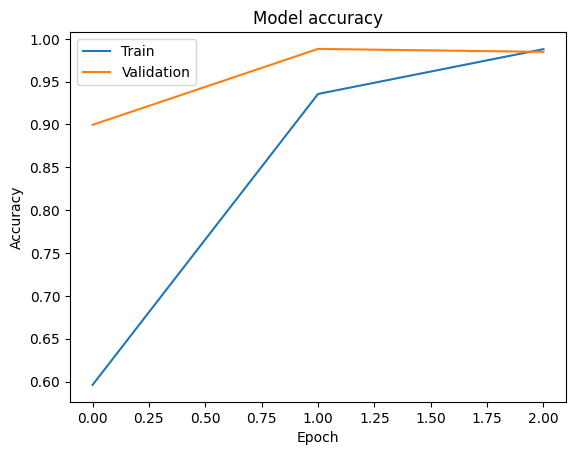

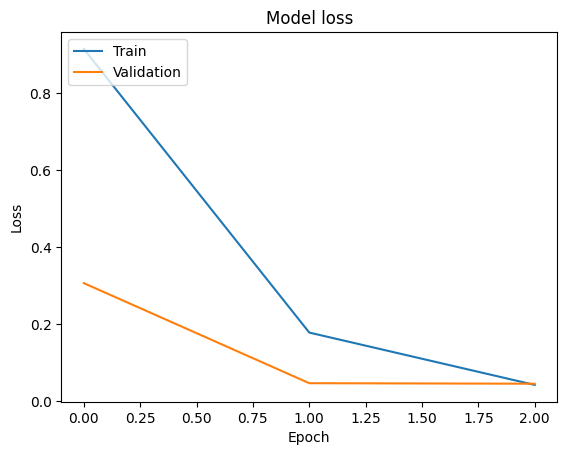

In [50]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [52]:
test_labels = test_gen_new.classes
predictions = vit_model.predict(test_gen_new)
predicted_classes = np.argmax(predictions, axis=1)

127/127 ━━━━━━━━━━━━━━━━━━━━ 16s 111ms/step


In [53]:
report = classification_report(test_labels, predicted_classes, target_names=list(test_gen_new.class_indices.keys()))
print(report)

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       508
           1       1.00      1.00      1.00       508
           2       1.00      1.00      1.00       508
           3       1.00      0.95      0.97       507

    accuracy                           0.99      2031
   macro avg       0.99      0.99      0.99      2031
weighted avg       0.99      0.99      0.99      2031



In [54]:
conf_matrix = confusion_matrix(test_labels, predicted_classes)

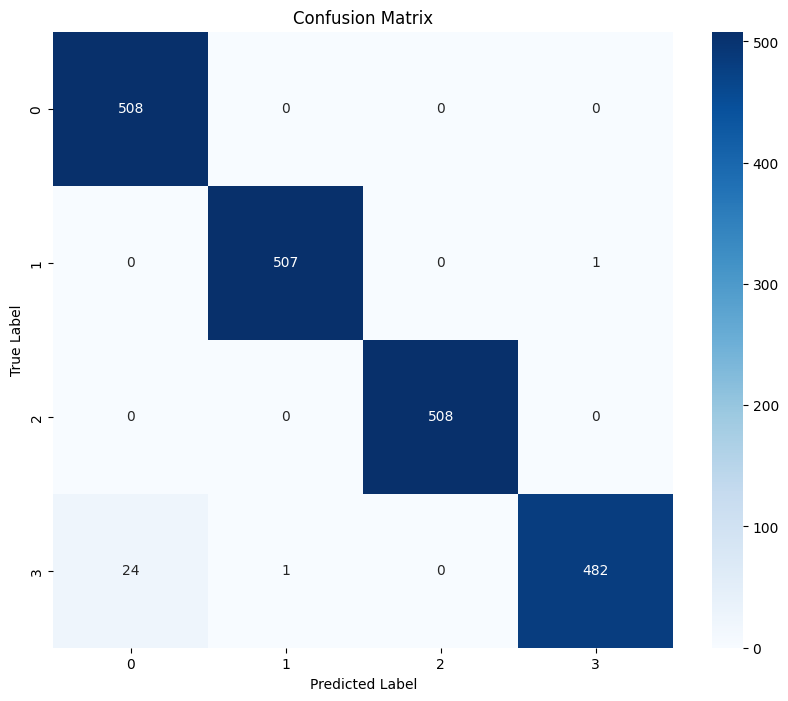

In [55]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=list(test_gen_new.class_indices.keys()), yticklabels=list(test_gen_new.class_indices.keys()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [65]:
def visualize_embeddings(embeddings, labels, method='tsne'):
  """Visualizes embeddings using t-SNE or PCA.

  Args:
    embeddings: A NumPy array of shape (num_samples, embedding_dim).
    labels: A NumPy array of shape (num_samples,) containing the labels.
    method: The dimensionality reduction method to use ('tsne' or 'pca').
  """

  if method == 'tsne':
    perplexity_value = min(30, embeddings.shape[0] - 1)  # Ensure perplexity < n_samples
    reducer = TSNE(n_components=2, perplexity=perplexity_value, random_state=42)
  elif method == 'pca':
    reducer = PCA(n_components=2, random_state=42)
  else:
    raise ValueError("Invalid method. Choose 'tsne' or 'pca'.")

  reduced_embeddings = reducer.fit_transform(embeddings)

  plt.figure(figsize=(8, 6))
  for label in np.unique(labels):
    indices = np.where(labels == label)[0]
    plt.scatter(reduced_embeddings[indices, 0], reduced_embeddings[indices, 1], label=label)
  plt.legend()
  plt.title(f'Embeddings Visualization using {method.upper()}')
  plt.show()

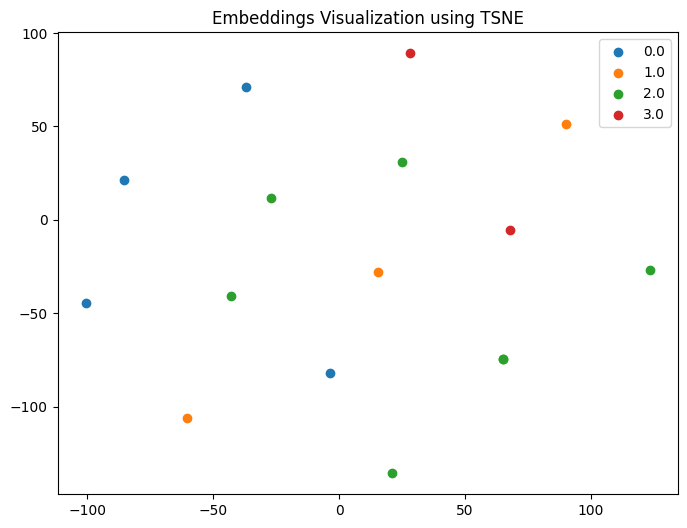

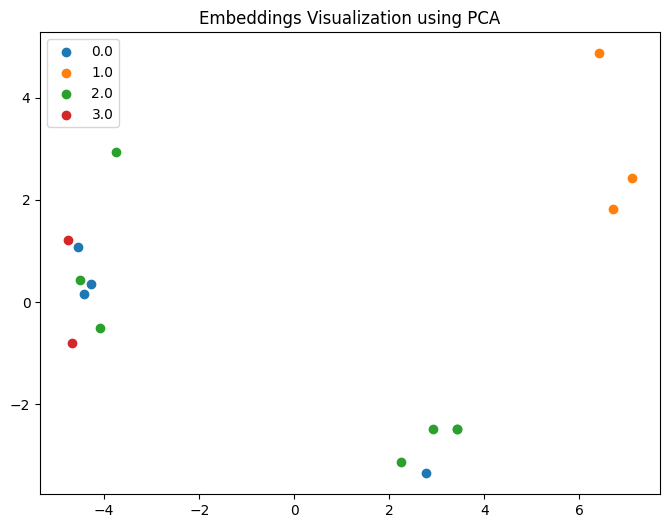

In [69]:
test_images, test_labels_batch = next(test_gen_new)

embeddings = vit_model.get_layer('patch_embedding')(test_images)  # Call the layer with input
embeddings = embeddings.numpy()  # Convert to NumPy array

embeddings = embeddings.reshape(embeddings.shape[0], -1)

labels = test_labels_batch  # Or any other labels you have, but ensure they correspond to the embeddings

visualize_embeddings(embeddings, labels, method='tsne')
visualize_embeddings(embeddings, labels, method='pca')

# Swin Transformer

In [70]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

class WindowAttention(layers.Layer):
    def __init__(self, dim, num_heads, window_size):
        super().__init__()
        self.num_heads = num_heads
        self.scale = (dim // num_heads) ** -0.5
        self.qkv = layers.Dense(dim * 3, use_bias=False)
        self.proj = layers.Dense(dim)
        self.window_size = window_size

    def call(self, x):
        B, N, C = tf.shape(x)[0], tf.shape(x)[1], tf.shape(x)[2]
        qkv = self.qkv(x)
        qkv = tf.reshape(qkv, (B, N, 3, self.num_heads, C // self.num_heads))
        qkv = tf.transpose(qkv, [2, 0, 3, 1, 4])
        q, k, v = qkv[0], qkv[1], qkv[2]
        attn = tf.matmul(q, k, transpose_b=True) * self.scale
        attn = tf.nn.softmax(attn)
        x = tf.matmul(attn, v)
        x = tf.transpose(x, [0, 2, 1, 3])
        x = tf.reshape(x, (B, N, C))
        return self.proj(x)

class SwinTransformerBlock(layers.Layer):
    def __init__(self, dim, num_heads, window_size):
        super().__init__()
        self.norm1 = layers.LayerNormalization()
        self.attn = WindowAttention(dim, num_heads, window_size)
        self.norm2 = layers.LayerNormalization()
        self.mlp = keras.Sequential([
            layers.Dense(dim * 4, activation='gelu'),
            layers.Dense(dim)
        ])

    def call(self, x):
        x = x + self.attn(self.norm1(x))
        x = x + self.mlp(self.norm2(x))
        return x

class SwinTransformer(layers.Layer):
    def __init__(self, input_shape, patch_size=4, embed_dim=96, num_heads=3, window_size=7):
        super().__init__()
        self.patch_embed = layers.Conv2D(embed_dim, kernel_size=patch_size, strides=patch_size, padding='same')
        self.swin_block = SwinTransformerBlock(embed_dim, num_heads, window_size)
        self.pool = layers.GlobalAveragePooling1D()
        self.fc = layers.Dense(4, activation='softmax')

    def call(self, x):
        x = self.patch_embed(x)
        x = tf.reshape(x, (tf.shape(x)[0], -1, x.shape[-1]))
        x = self.swin_block(x)
        x = self.pool(x)
        return self.fc(x)

input_shape = (224, 224, 3)
model = keras.Sequential([
    layers.Input(shape=input_shape),
    SwinTransformer(input_shape)
])

model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ swin_transformer (SwinTransformer)   │ (None, 4)                   │         116,644 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 116,644 (455.64 KB)

 Trainable params: 116,644 (455.64 KB)

 Non-trainable params: 0 (0.00 B)

In [71]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=5
)

Epoch 1/5
1016/1016 ━━━━━━━━━━━━━━━━━━━━ 202s 187ms/step - accuracy: 0.4471 - loss: 1.1738 - val_accuracy: 0.6135 - val_loss: 0.8723
Epoch 2/5
1016/1016 ━━━━━━━━━━━━━━━━━━━━ 181s 178ms/step - accuracy: 0.6431 - loss: 0.8201 - val_accuracy: 0.7725 - val_loss: 0.6187
Epoch 3/5
1016/1016 ━━━━━━━━━━━━━━━━━━━━ 202s 178ms/step - accuracy: 0.7510 - loss: 0.6129 - val_accuracy: 0.7922 - val_loss: 0.5177
Epoch 4/5
1016/1016 ━━━━━━━━━━━━━━━━━━━━ 181s 178ms/step - accuracy: 0.7989 - loss: 0.5173 - val_accuracy: 0.8099 - val_loss: 0.4611
Epoch 5/5
1016/1016 ━━━━━━━━━━━━━━━━━━━━ 191s 188ms/step - accuracy: 0.8258 - loss: 0.4497 - val_accuracy: 0.8621 - val_loss: 0.3759


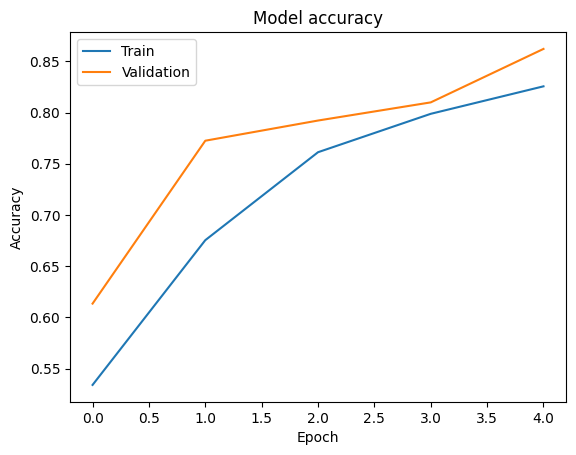

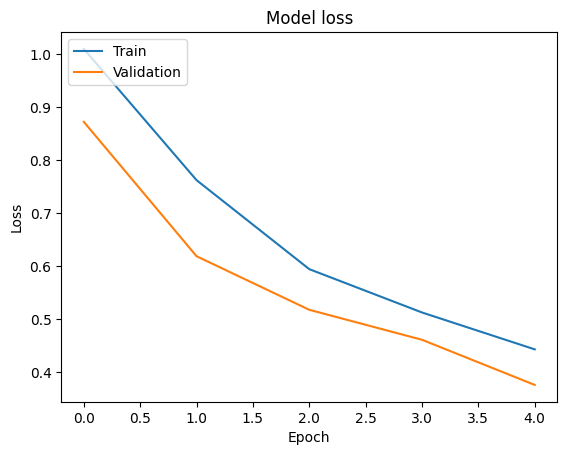

In [72]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [73]:
test_labels = test_gen_new.classes
predictions = model.predict(test_gen_new)
predicted_classes = np.argmax(predictions, axis=1)

127/127 ━━━━━━━━━━━━━━━━━━━━ 13s 95ms/step


In [74]:
report = classification_report(test_labels, predicted_classes, target_names=list(test_gen_new.class_indices.keys()))
print(report)

              precision    recall  f1-score   support

           0       0.84      0.85      0.84       508
           1       0.92      0.86      0.89       508
           2       0.75      0.91      0.82       508
           3       0.96      0.80      0.87       507

    accuracy                           0.86      2031
   macro avg       0.87      0.86      0.86      2031
weighted avg       0.87      0.86      0.86      2031



In [75]:
conf_matrix = confusion_matrix(test_labels, predicted_classes)


In [76]:
conf_matrix

array([[431,   0,  68,   9],
       [  6, 439,  57,   6],
       [ 28,  15, 464,   1],
       [ 50,  25,  28, 404]])

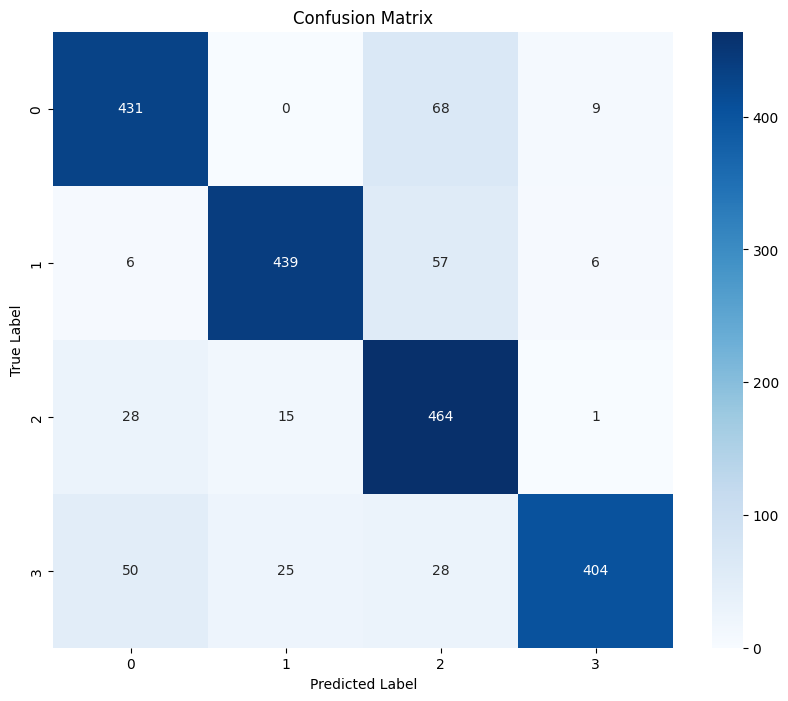

In [77]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=list(test_gen_new.class_indices.keys()), yticklabels=list(test_gen_new.class_indices.keys()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

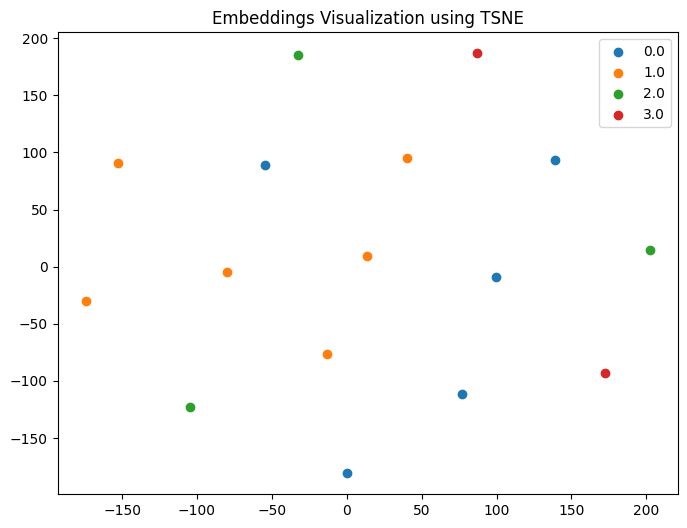

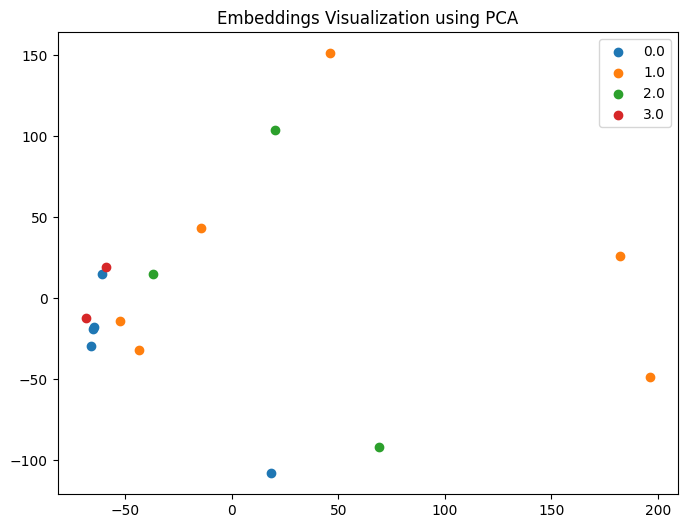

In [80]:
test_images, test_labels_batch = next(test_gen_new)
embeddings = model.layers[0].patch_embed(test_images)  # Access patch_embed using .patch_embed
embeddings = embeddings.numpy()  # Convert to NumPy array
embeddings = embeddings.reshape(embeddings.shape[0], -1)
labels = test_labels_batch

visualize_embeddings(embeddings, labels, method='tsne')
visualize_embeddings(embeddings, labels, method='pca')

# MaxVit Transformer

In [81]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2

batch_size = 16
img_size = (224, 224, 3)
patch_size = 16
embed_dim = 64
num_heads = 4
window_size = 7
num_blocks = 1
mlp_dim = 128
num_classes = 4
dropout_rate = 0.1
weight_decay = 1e-4

initial_learning_rate = 1e-4
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=1000, decay_rate=0.9, staircase=True
)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

class PatchEmbedding(layers.Layer):
    def __init__(self, patch_size, embed_dim):
        super(PatchEmbedding, self).__init__()
        self.patch_size = patch_size
        self.embed_dim = embed_dim
        self.proj = layers.Conv2D(embed_dim, patch_size, strides=patch_size, padding='valid', kernel_regularizer=l2(weight_decay))

    def call(self, images):
        patches = self.proj(images)
        patches = tf.reshape(patches, (tf.shape(patches)[0], -1, self.embed_dim))
        return patches

class LocalWindowAttention(layers.Layer):
    def __init__(self, embed_dim, num_heads, window_size):
        super(LocalWindowAttention, self).__init__()
        self.embed_dim = embed_dim
        self.num_heads = num_heads
        self.window_size = window_size
        self.attention = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim // num_heads)

    def call(self, x):
        _, h, w, c = x.shape

        x = tf.reshape(x, (-1, h // self.window_size, self.window_size, w // self.window_size, self.window_size, c))
        x = tf.transpose(x, (0, 1, 3, 2, 4, 5))
        x = tf.reshape(x, (-1, self.window_size * self.window_size, c))

        x = self.attention(x, x)

        x = tf.reshape(x, (-1, h // self.window_size, w // self.window_size, self.window_size, self.window_size, c))
        x = tf.transpose(x, (0, 1, 3, 2, 4, 5))
        x = tf.reshape(x, (-1, h, w, c))
        return x

class MaxViTBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, window_size):
        super(MaxViTBlock, self).__init__()
        self.embed_dim = embed_dim
        self.num_heads = num_heads
        self.window_size = window_size

        self.local_attention = LocalWindowAttention(embed_dim, num_heads, window_size)

        self.ffn = tf.keras.Sequential([
            layers.Conv2D(embed_dim * 2, kernel_size=1, activation='gelu', padding='same', kernel_regularizer=l2(weight_decay)),
            layers.Dropout(dropout_rate),
            layers.Conv2D(embed_dim, kernel_size=1, padding='same', kernel_regularizer=l2(weight_decay)),
            layers.Dropout(dropout_rate)
        ])

    def call(self, x):

        x = self.local_attention(x)

        x = self.ffn(x)
        return x

class SimplifiedMaxViT(tf.keras.Model):
    def __init__(self, image_size, patch_size, embed_dim, num_heads, num_blocks, window_size, num_classes, dropout_rate=0.1):
        super(SimplifiedMaxViT, self).__init__()
        self.patch_embed = PatchEmbedding(patch_size, embed_dim)

        height, width, _ = image_size
        num_patches = (height // patch_size) * (width // patch_size)
        self.pos_embed = self.add_weight(
            name="pos_embed",
            shape=(1, num_patches, embed_dim),
            initializer=tf.initializers.RandomNormal(stddev=0.02),
            trainable=True
        )

        self.dropout = layers.Dropout(dropout_rate)
        self.blocks = [MaxViTBlock(embed_dim, num_heads, window_size) for _ in range(num_blocks)]
        self.layernorm = layers.LayerNormalization(epsilon=1e-6)
        self.classifier = layers.Dense(num_classes, activation='softmax', kernel_regularizer=l2(weight_decay))

    def call(self, images):

        patches = self.patch_embed(images)

        pos_embed = tf.repeat(self.pos_embed, repeats=tf.shape(patches)[0], axis=0)
        x = patches + pos_embed
        x = self.dropout(x)

        _, num_patches, embed_dim = x.shape
        h = w = int(num_patches ** 0.5)
        x = tf.reshape(x, (-1, h, w, embed_dim))

        for block in self.blocks:
            x = block(x)

        x = tf.reduce_mean(x, axis=[1, 2])
        x = self.layernorm(x)

        return self.classifier(x)

model = SimplifiedMaxViT(
    image_size=img_size,
    patch_size=patch_size,
    embed_dim=embed_dim,
    num_heads=num_heads,
    num_blocks=num_blocks,
    window_size=window_size,
    num_classes=num_classes,
    dropout_rate=dropout_rate
)

model.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.build((None, *img_size))

In [82]:
history = model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=5
)

Epoch 1/5
1016/1016 ━━━━━━━━━━━━━━━━━━━━ 102s 92ms/step - accuracy: 0.3461 - loss: 1.3638 - val_accuracy: 0.3845 - val_loss: 1.2431
Epoch 2/5
1016/1016 ━━━━━━━━━━━━━━━━━━━━ 78s 77ms/step - accuracy: 0.4270 - loss: 1.2220 - val_accuracy: 0.5372 - val_loss: 1.0923
Epoch 3/5
1016/1016 ━━━━━━━━━━━━━━━━━━━━ 78s 77ms/step - accuracy: 0.5212 - loss: 1.0898 - val_accuracy: 0.5854 - val_loss: 0.9632
Epoch 4/5
1016/1016 ━━━━━━━━━━━━━━━━━━━━ 89s 88ms/step - accuracy: 0.6007 - loss: 0.9581 - val_accuracy: 0.6819 - val_loss: 0.8282
Epoch 5/5
1016/1016 ━━━━━━━━━━━━━━━━━━━━ 80s 79ms/step - accuracy: 0.6807 - loss: 0.7850 - val_accuracy: 0.7750 - val_loss: 0.6256


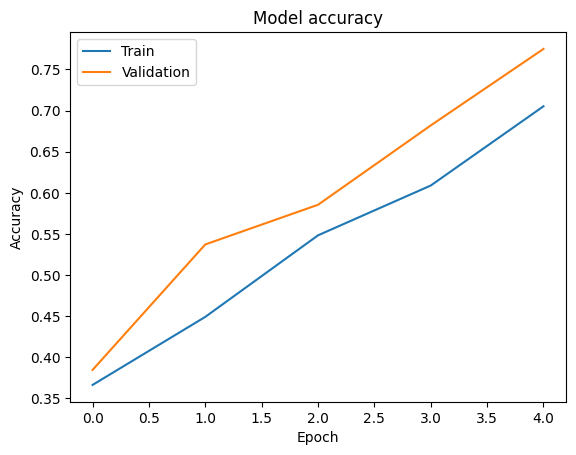

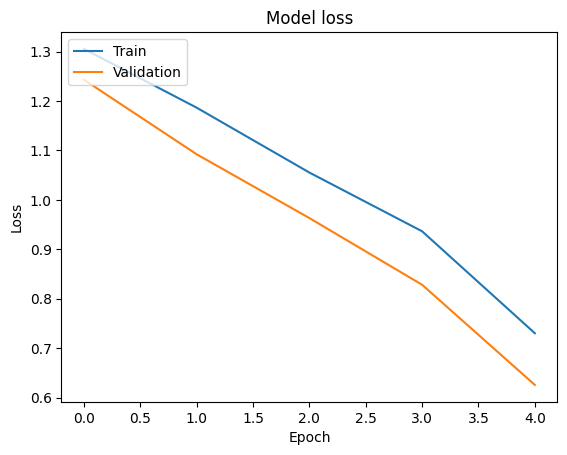

In [83]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [84]:
test_labels = test_gen_new.classes
predictions = model.predict(test_gen_new)
predicted_classes = np.argmax(predictions, axis=1)

127/127 ━━━━━━━━━━━━━━━━━━━━ 10s 74ms/step


In [85]:
report = classification_report(test_labels, predicted_classes, target_names=list(test_gen_new.class_indices.keys()))
print(report)

              precision    recall  f1-score   support

           0       0.78      0.82      0.80       508
           1       0.90      0.68      0.78       508
           2       0.63      0.84      0.72       508
           3       0.83      0.72      0.77       507

    accuracy                           0.76      2031
   macro avg       0.78      0.76      0.76      2031
weighted avg       0.78      0.76      0.76      2031



In [86]:
conf_matrix = confusion_matrix(test_labels, predicted_classes)

In [87]:
conf_matrix

array([[415,   0,  83,  10],
       [  5, 345, 101,  57],
       [ 68,   8, 425,   7],
       [ 45,  29,  69, 364]])

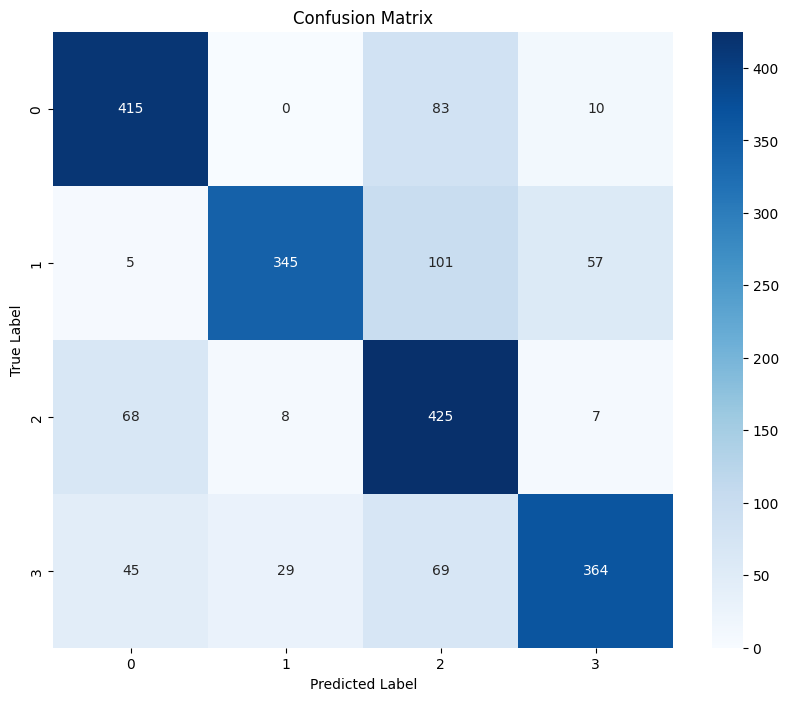

In [88]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=list(test_gen_new.class_indices.keys()), yticklabels=list(test_gen_new.class_indices.keys()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

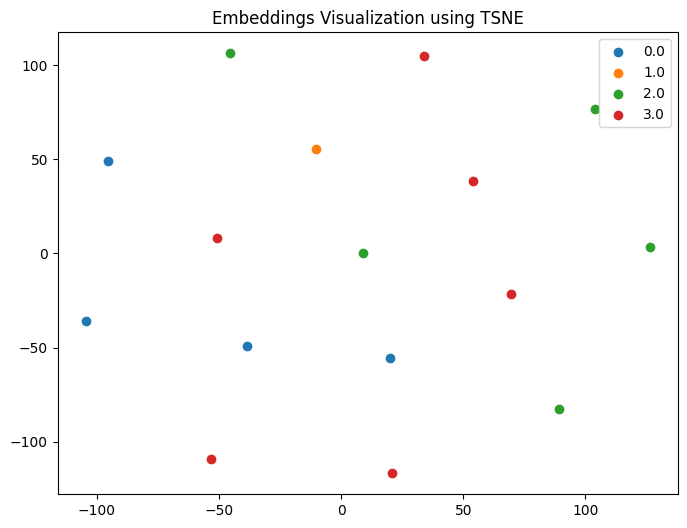

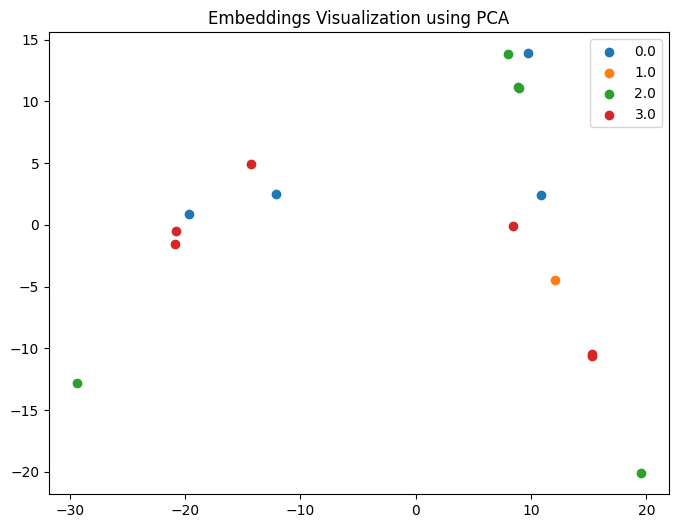

In [90]:
test_images, test_labels_batch = next(test_gen_new)

embeddings = model.patch_embed(test_images)
embeddings = embeddings.numpy()  # Convert to NumPy array
embeddings = embeddings.reshape(embeddings.shape[0], -1)

labels = test_labels_batch

visualize_embeddings(embeddings, labels, method='tsne')
visualize_embeddings(embeddings, labels, method='pca')